In [5]:
import re
import numpy as np
import pandas as pd
import json
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv("inmuebles_limpios.csv")
df

,precio_venta,area,habitaciones,banos,parqueaderos,estrato,barrio,antiguedad,localidad,descripcion,...,vigilancia,jacuzzi,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,piscina,salon_comunal,terraza
0,3.390000e+08,76.00,3.0,2.0,1.0,3.0,URB. PICADELLY,15.0,SUBA,apartamento en venta de 76m2 con vista exterio...,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.230000e+08,63.00,3.0,2.0,0.0,3.0,BARRANCAS PERLAS DEL NORTE,25.0,USAQUEN,apartamento en venta de 60m2 con vista interio...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.408982e+08,54.00,3.0,2.0,0.0,3.0,SAN VICTORINO,2.5,LOS MARTIRES,apartamento en venta de 54m2 con vista exterio...,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.580000e+08,43.00,2.0,2.0,0.0,2.0,LA ESTRELLA II,15.0,SUBA,apartamento en venta de 43 m2 con vista interi...,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2.228000e+08,48.00,3.0,2.0,0.0,3.0,HORIZONTES USAQUEN,25.0,USAQUEN,apartamento duplex en venta de 48m2 con vista ...,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43008,1.900000e+08,49.00,3.0,2.0,0.0,2.0,URB. OVIEDO,15.0,SUBA,apartamento en venta de 49m2 con vista interio...,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
43009,3.220000e+08,66.00,3.0,2.0,1.0,4.0,LOS TEJARES DE SUBA (PREDIO),15.0,SUBA,apartamento en venta de 61m2 con vista interio...,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
43010,3.300000e+08,90.00,3.0,2.0,0.0,4.0,LAS AMERICAS,25.0,TEUSAQUILLO,!oportunidad! apartamento de 90m2 con excelent...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43011,1.280000e+09,157.00,3.0,3.0,3.0,6.0,S.C. SAN NORTE,25.0,USAQUEN,vendo hermoso apartamento en altos de bella su...,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43013 entries, 0 to 43012
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio_venta        27584 non-null  float64
 1   area                43013 non-null  float64
 2   habitaciones        43012 non-null  float64
 3   banos               43012 non-null  float64
 4   parqueaderos        43012 non-null  float64
 5   estrato             43012 non-null  float64
 6   barrio              42820 non-null  object 
 7   antiguedad          40966 non-null  float64
 8   localidad           43013 non-null  object 
 9   descripcion         43013 non-null  object 
 10  distancia_parque_m  43013 non-null  float64
 11  vigilancia          43011 non-null  float64
 12  jacuzzi             43011 non-null  float64
 13  chimenea            43011 non-null  float64
 14  permite_mascotas    43011 non-null  float64
 15  gimnasio            43011 non-null  float64
 16  asce

,precio_venta,area,habitaciones,banos,parqueaderos,estrato,antiguedad,distancia_parque_m,vigilancia,jacuzzi,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,piscina,salon_comunal,terraza
count,2.758400e+04,4.301300e+04,43012.000000,43012.000000,43012.000000,43012.000000,40966.000000,43013.000000,43011.000000,43011.000000,43011.0,43011.0,43011.000000,43011.000000,43011.000000,43011.000000,43011.0,43011.000000
mean,2.364794e+09,1.800341e+02,2.615340,2.701339,1.662862,4.844648,14.759557,808.884766,0.587385,0.045267,0.0,0.0,0.295204,0.628118,0.390482,0.090419,0.0,0.001023
std,5.574198e+10,9.163002e+03,0.850046,1.196659,1.114685,1.236190,8.680376,447.796211,0.492310,0.207893,0.0,0.0,0.456140,0.483313,0.487864,0.286784,0.0,0.031968
min,1.000000e+06,0.000000e+00,1.000000,0.000000,-2.000000,0.000000,2.500000,0.220000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.029000e+08,6.300000e+01,2.000000,2.000000,1.000000,4.000000,7.500000,470.140000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,7.000000e+08,1.000000e+02,3.000000,3.000000,2.000000,5.000000,15.000000,750.140000,1.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
75%,1.330000e+09,1.740000e+02,3.000000,4.000000,2.000000,6.000000,25.000000,1087.730000,1.000000,0.000000,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.0,0.000000
max,4.250000e+12,1.900000e+06,7.000000,6.000000,30.000000,6.000000,25.000000,6276.510000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


array([[<Axes: title={'center': 'precio_venta'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'habitaciones'}>,
        <Axes: title={'center': 'banos'}>],
       [<Axes: title={'center': 'parqueaderos'}>,
        <Axes: title={'center': 'estrato'}>,
        <Axes: title={'center': 'antiguedad'}>,
        <Axes: title={'center': 'distancia_parque_m'}>],
       [<Axes: title={'center': 'vigilancia'}>,
        <Axes: title={'center': 'jacuzzi'}>,
        <Axes: title={'center': 'chimenea'}>,
        <Axes: title={'center': 'permite_mascotas'}>],
       [<Axes: title={'center': 'gimnasio'}>,
        <Axes: title={'center': 'ascensor'}>,
        <Axes: title={'center': 'conjunto_cerrado'}>,
        <Axes: title={'center': 'piscina'}>],
       [<Axes: title={'center': 'salon_comunal'}>,
        <Axes: title={'center': 'terraza'}>, <Axes: >, <Axes: >]],
      dtype=object)

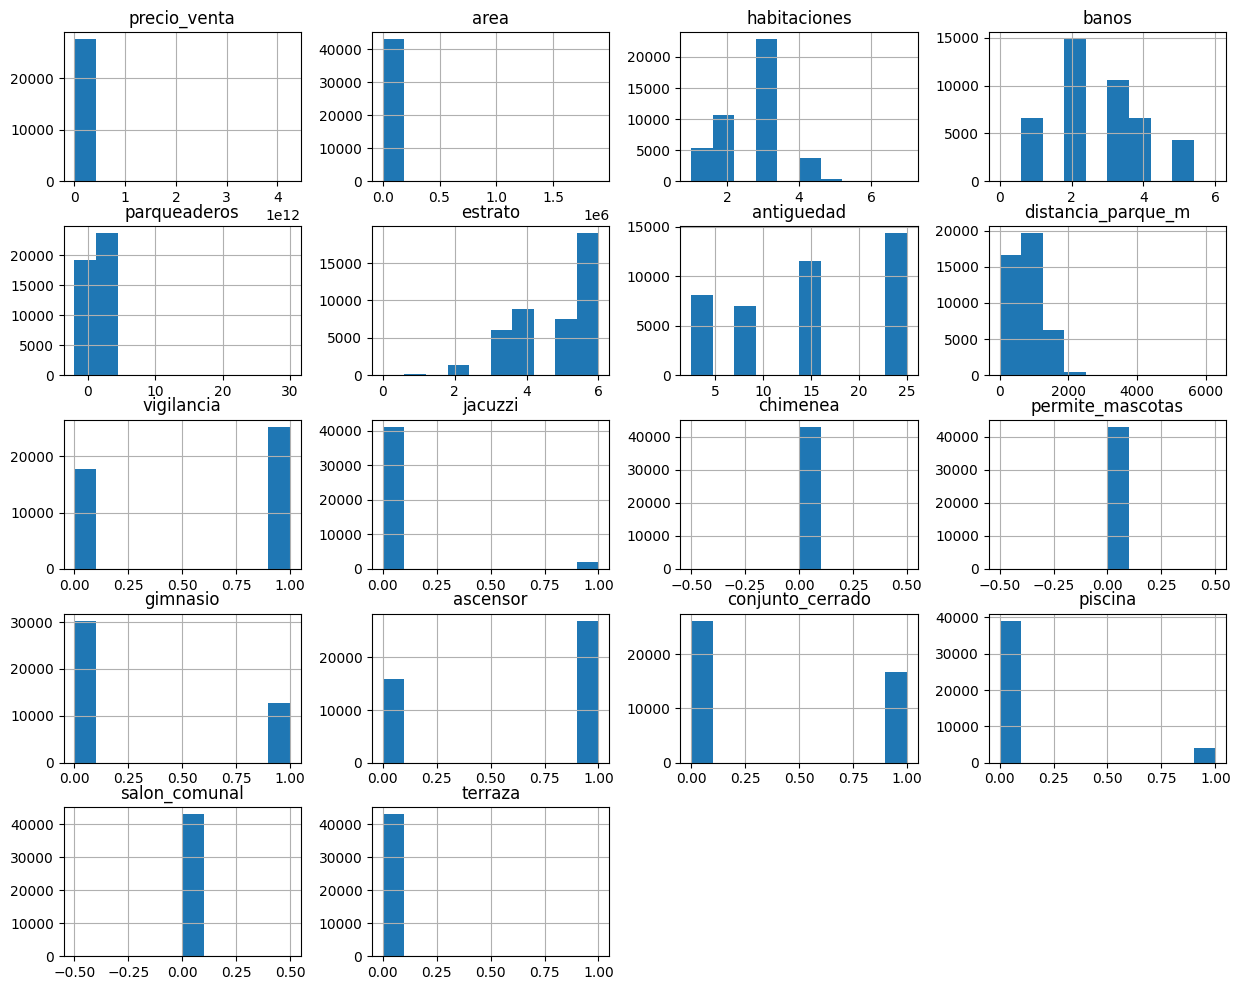

In [13]:
df.hist(figsize=(15, 12))

In [ ]:
df = df.dropna(subset=["precio_venta"]).copy()


num_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "string"]).columns.tolist()


for col in num_cols:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].median())


for col in cat_cols:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].mode().iloc[0])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27584 entries, 0 to 43012
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio_venta        27584 non-null  float64
 1   area                27584 non-null  float64
 2   habitaciones        27584 non-null  float64
 3   banos               27584 non-null  float64
 4   parqueaderos        27584 non-null  float64
 5   estrato             27584 non-null  float64
 6   barrio              27584 non-null  object 
 7   antiguedad          27584 non-null  float64
 8   localidad           27584 non-null  object 
 9   descripcion         27584 non-null  object 
 10  distancia_parque_m  27584 non-null  float64
 11  vigilancia          27584 non-null  float64
 12  jacuzzi             27584 non-null  float64
 13  chimenea            27584 non-null  float64
 14  permite_mascotas    27584 non-null  float64
 15  gimnasio            27584 non-null  float64
 16  ascensor 

array([[<Axes: title={'center': 'precio_venta'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'habitaciones'}>,
        <Axes: title={'center': 'banos'}>],
       [<Axes: title={'center': 'parqueaderos'}>,
        <Axes: title={'center': 'estrato'}>,
        <Axes: title={'center': 'antiguedad'}>,
        <Axes: title={'center': 'distancia_parque_m'}>],
       [<Axes: title={'center': 'vigilancia'}>,
        <Axes: title={'center': 'jacuzzi'}>,
        <Axes: title={'center': 'chimenea'}>,
        <Axes: title={'center': 'permite_mascotas'}>],
       [<Axes: title={'center': 'gimnasio'}>,
        <Axes: title={'center': 'ascensor'}>,
        <Axes: title={'center': 'conjunto_cerrado'}>,
        <Axes: title={'center': 'piscina'}>],
       [<Axes: title={'center': 'salon_comunal'}>,
        <Axes: title={'center': 'terraza'}>, <Axes: >, <Axes: >]],
      dtype=object)

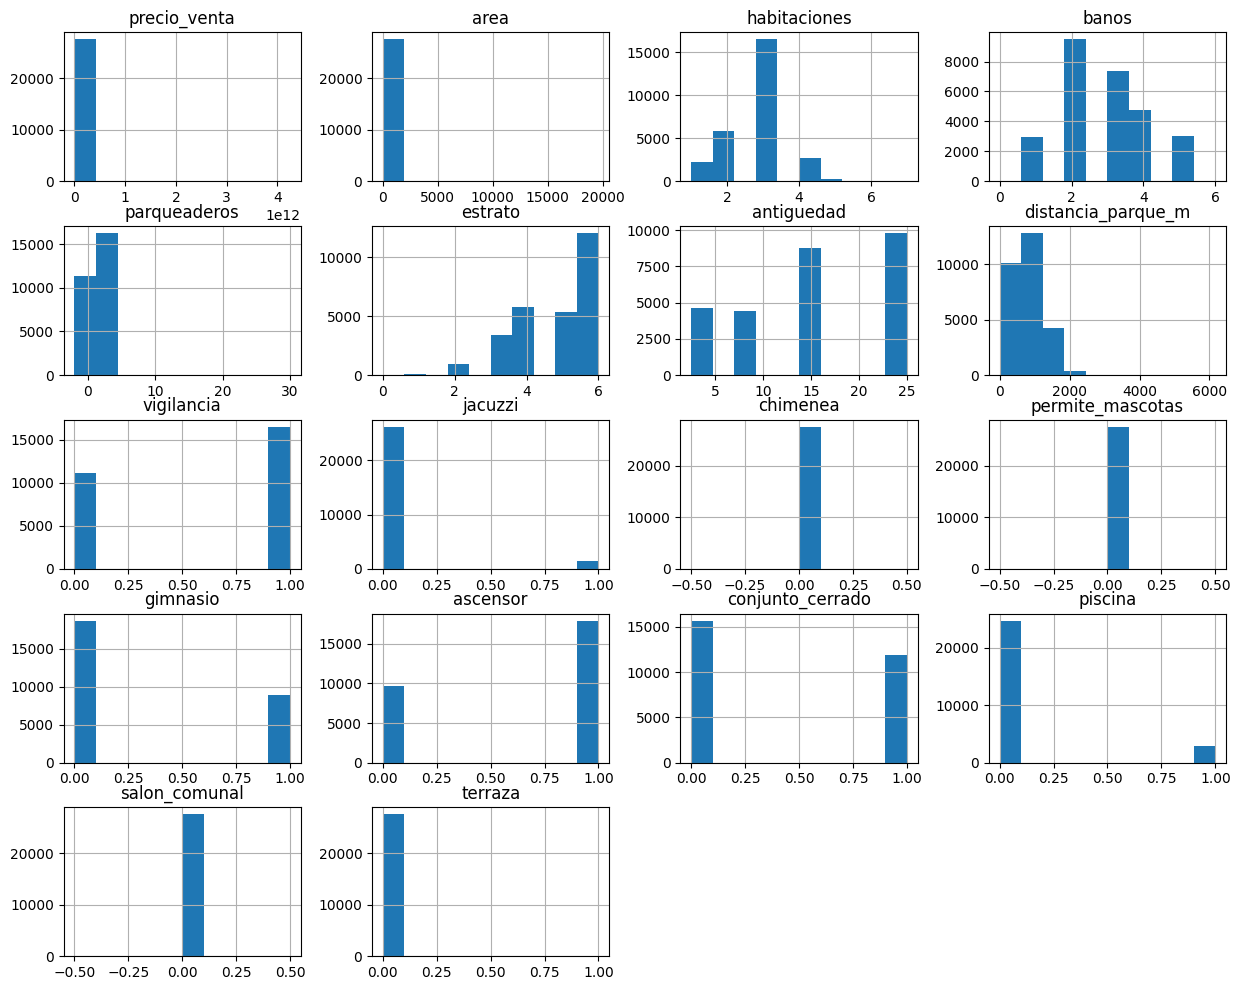

In [17]:
df.hist(figsize=(15, 12))

,precio_venta,area,habitaciones,banos,parqueaderos,estrato,antiguedad,distancia_parque_m,vigilancia,jacuzzi,...,hash_1014,hash_1015,hash_1016,hash_1017,hash_1018,hash_1019,hash_1020,hash_1021,hash_1022,hash_1023
0,3.390000e+08,76.00,3.0,2.0,1.0,3.0,15.0,426.09,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.230000e+08,63.00,3.0,2.0,0.0,3.0,25.0,472.47,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.408982e+08,54.00,3.0,2.0,0.0,3.0,2.5,961.29,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.580000e+08,43.00,2.0,2.0,0.0,2.0,15.0,539.98,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.228000e+08,48.00,3.0,2.0,0.0,3.0,25.0,1661.14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27579,1.900000e+08,49.00,3.0,2.0,0.0,2.0,15.0,198.03,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27580,3.220000e+08,66.00,3.0,2.0,1.0,4.0,15.0,631.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27581,3.300000e+08,90.00,3.0,2.0,0.0,4.0,25.0,1211.62,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27582,1.280000e+09,157.00,3.0,3.0,3.0,6.0,25.0,1269.56,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_enc = df.copy()


for col in ["barrio", "localidad", "descripcion"]:
    df_enc[col] = df_enc[col].fillna("desconocido").astype(str)


le = LabelEncoder()
for col in ["barrio", "localidad", "descripcion"]:
    df_enc[col] = le.fit_transform(df_enc[col])


df_enc = df_enc.fillna(df_enc.median(numeric_only=True))

In [29]:
df = df_enc
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27584 entries, 0 to 43012
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio_venta        27584 non-null  float64
 1   area                27584 non-null  float64
 2   habitaciones        27584 non-null  float64
 3   banos               27584 non-null  float64
 4   parqueaderos        27584 non-null  float64
 5   estrato             27584 non-null  float64
 6   barrio              27584 non-null  int32  
 7   antiguedad          27584 non-null  float64
 8   localidad           27584 non-null  int32  
 9   descripcion         27584 non-null  int32  
 10  distancia_parque_m  27584 non-null  float64
 11  vigilancia          27584 non-null  float64
 12  jacuzzi             27584 non-null  float64
 13  chimenea            27584 non-null  float64
 14  permite_mascotas    27584 non-null  float64
 15  gimnasio            27584 non-null  float64
 16  ascensor 

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop("precio_venta", axis=1)
y = df["precio_venta"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: >

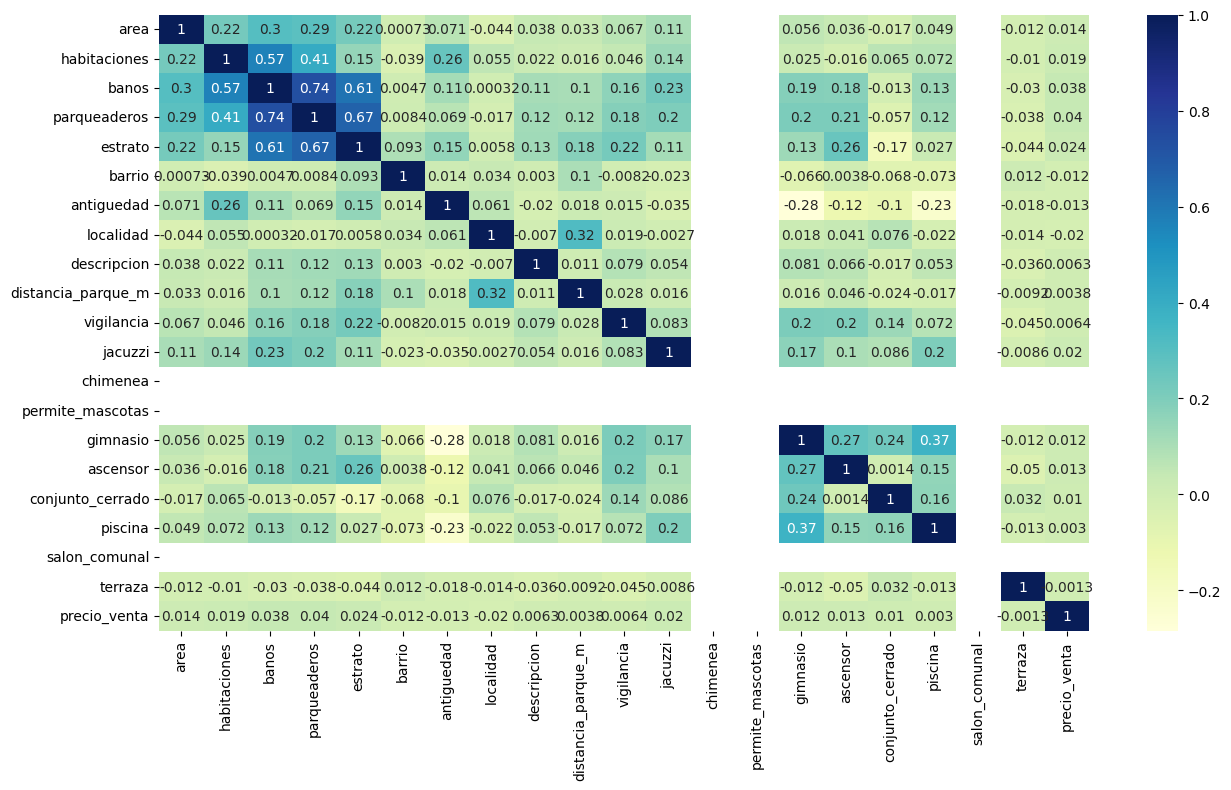

In [31]:
train_data = X_train.join(y_train)

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [35]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, y_train)
Y_pred_RFR = model_RFR.predict(X_test)

mean_absolute_percentage_error(y_test, Y_pred_RFR)
print(f"Mean absolute error: {mean_absolute_percentage_error(y_test, Y_pred_RFR)}")
r2 = model_RFR.score(X_test, y_test)
print("Score del Random Forest:", r2)

Mean absolute error: 2.9159001526382626
Score del Random Forest: -0.27464474316312226


In [36]:
#SVM Support vector machine
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
Y_pred_SVR = model_SVR.predict(X_test)

r2 = model_SVR.score(X_test, y_test)
print(mean_absolute_percentage_error(y_test, Y_pred_SVR))
print("Score:", r2)

1.850513291213258
Score: -0.0009132043214754582


In [37]:
#Linear Regression
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
Y_pred_LR = model_LR.predict(X_test)

r2 = model_LR.score(X_test, y_test)
print(mean_absolute_percentage_error(y_test, Y_pred_LR))
print("Score:", r2)

8.144173840134954
Score: 0.0023435994702890595
